# ШАД. Машинное обучение

## Лабораторная работа 3. Байесовский подход

**Правила:**

* Выполненную работу нужно отправить в соответствующее задание в личном кабинете
* Дедлайн **02.10.2022 в 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Теоретическую часть можно оформить в ноутбуке или же прислать в задание фотографии
* Если вы прикрепляете фотографии к ноутбуку, убедитесь, что они "вшиты" туда, а не ссылаются на локальный путь
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* За задание можно получить до **13 баллов**.

### Задача Т1 (3 балла)

Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta, 1)$. Найдите апостериорное распределение параметра $\theta$ и его математическое ожидание, если априорное распределение $\theta \sim \text{Bern}(p)$.

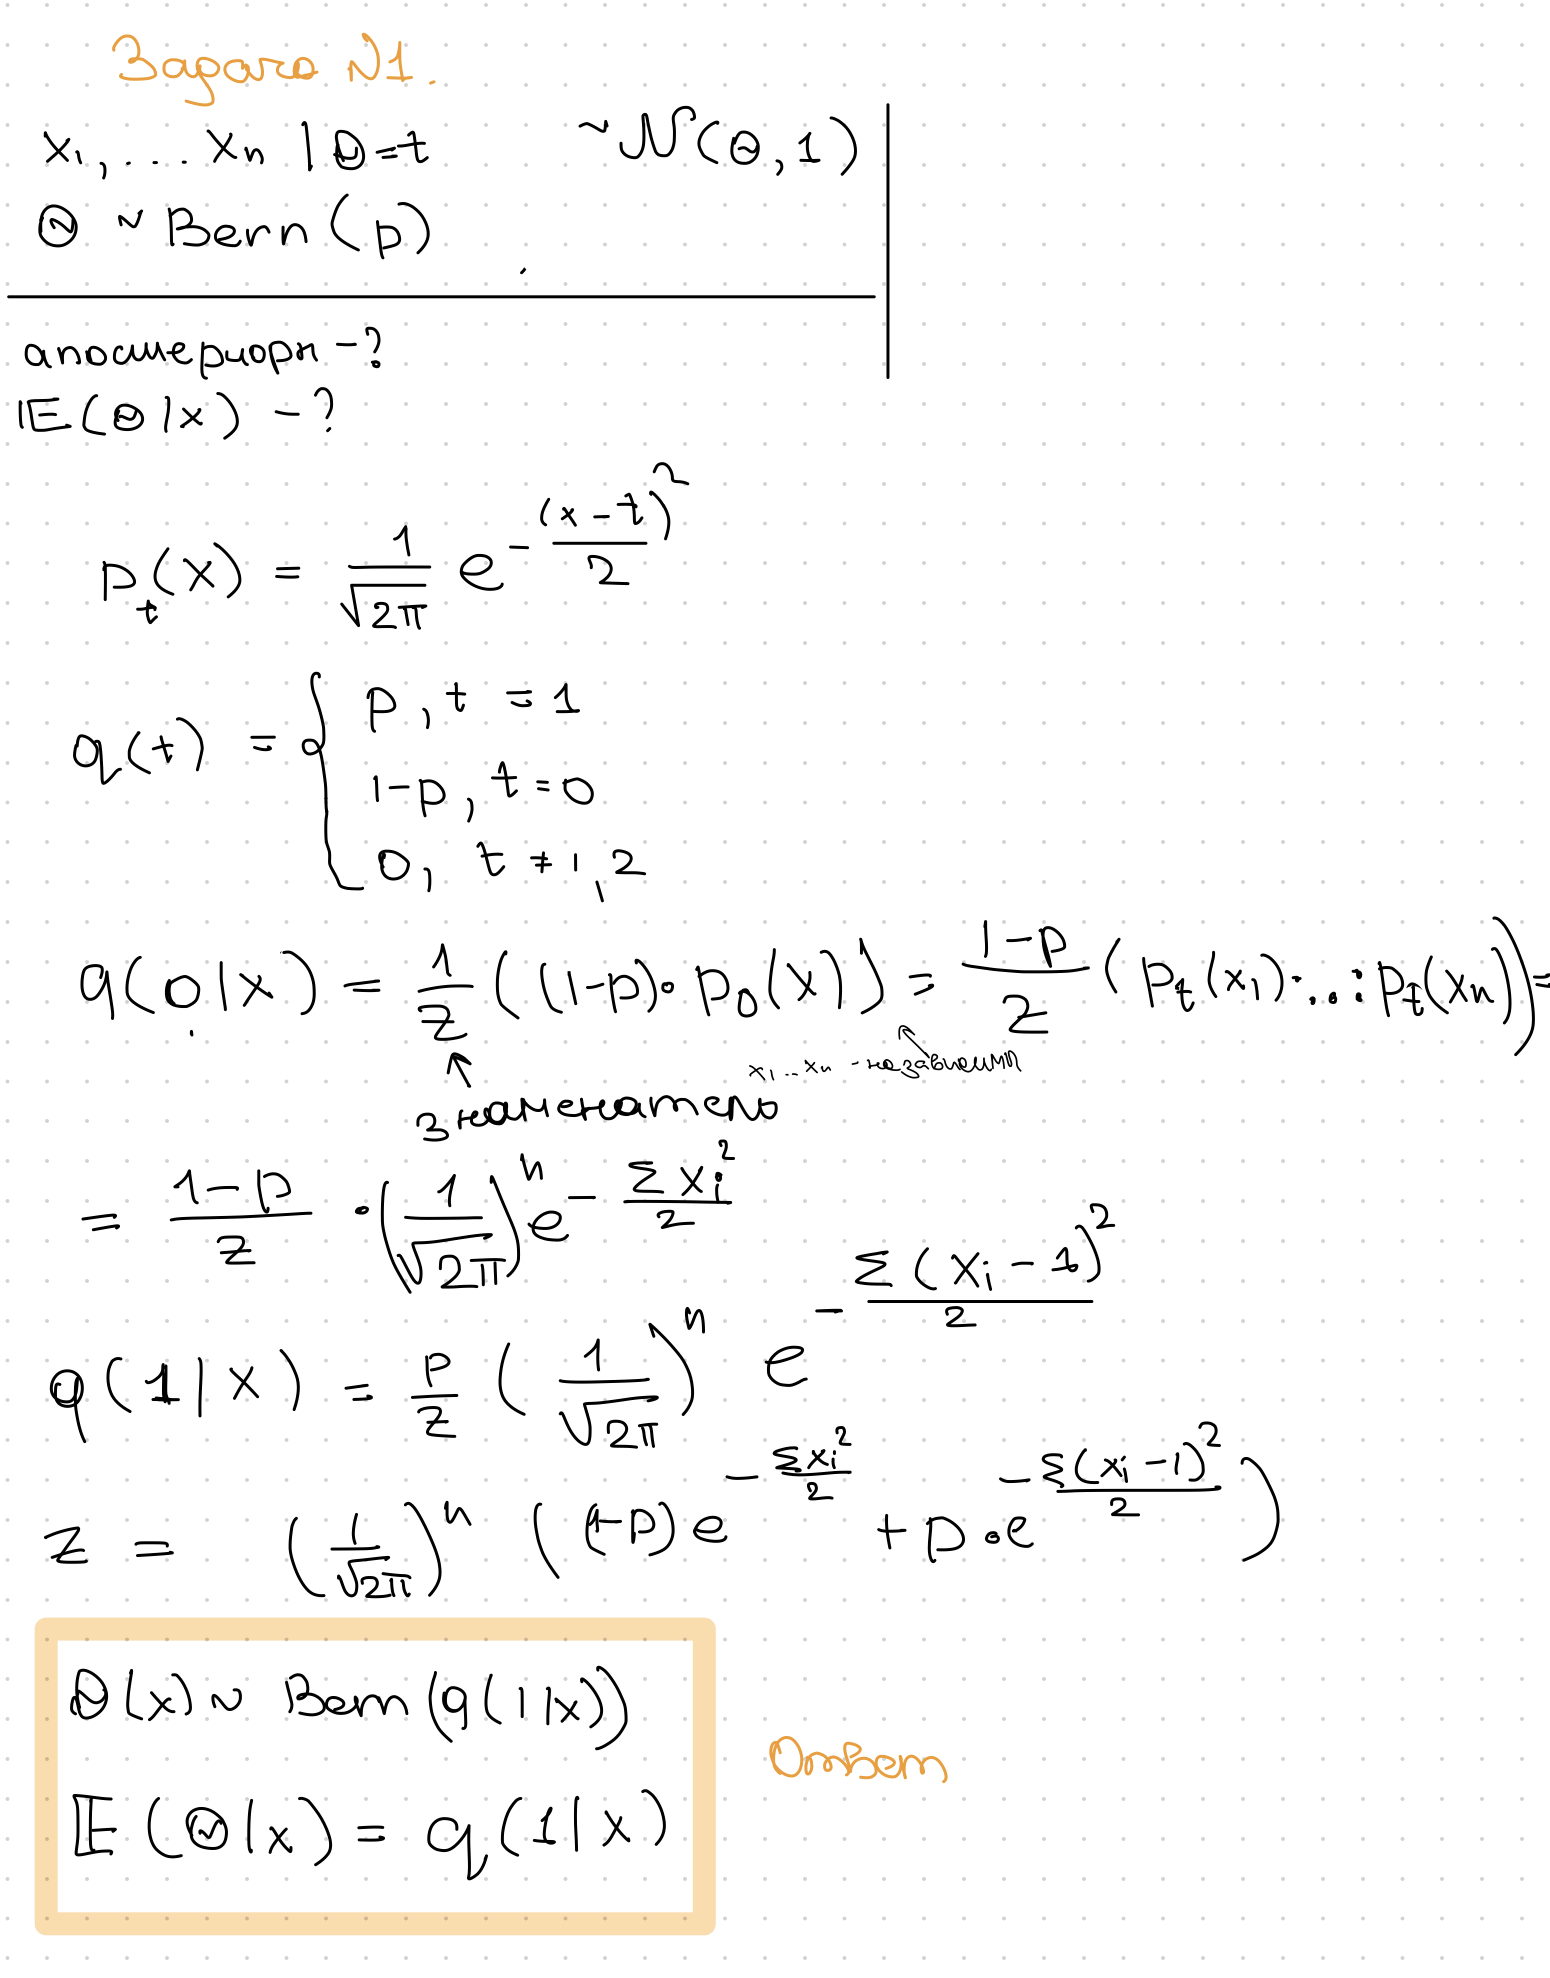

### Задача Т2 (3 балла)

Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\text{Bin}(m, p)$, $m$ известно. Подберите сопряжённое распределение и найдите апостериорное распределение параметра $p$, точечные оценки на его основе (моду, медиану, математическое ожидание), а также доверительный интервал, построенный по апостериорному распределению.

Замечания:
- Можете начать решать задачу с $m=1$
- Формулы для характеристик известных распределений можно не доказывать

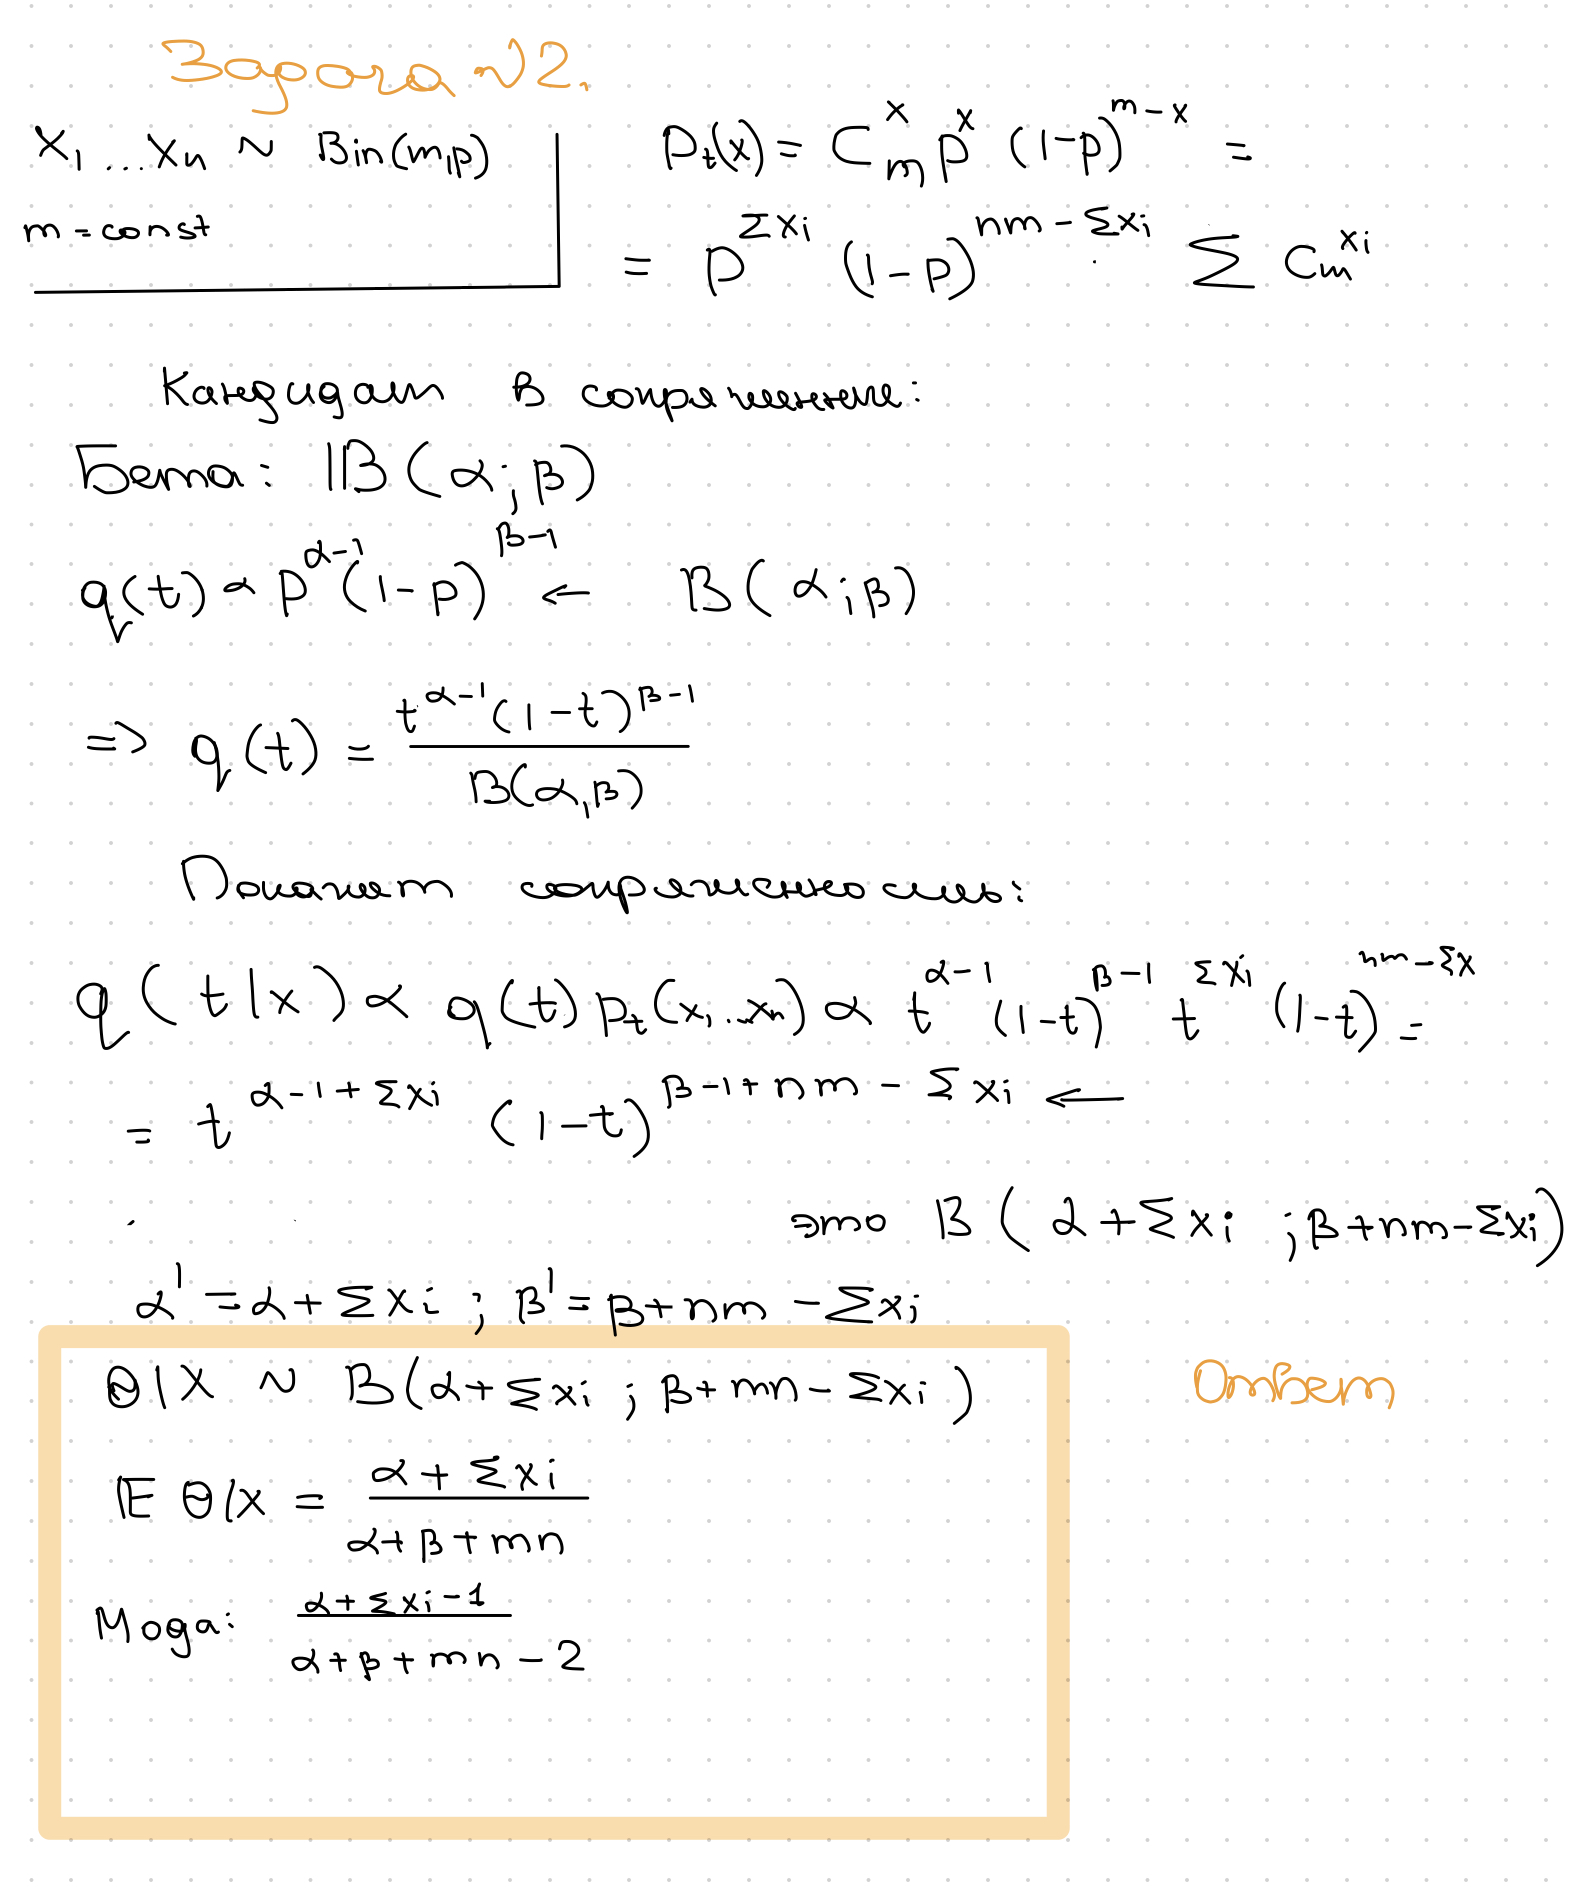

### Задача 1 (7 баллов)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
sns.set(palette='Set2')

Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

**1)** Постройте несколько графиков сопряженного распределения для разных параметров и **охарактеризуйте**, как его значения параметров соотносятся с априорными знаниями о монете.
Можно рассмотреть следующие случаи.
* Монета скорее честная. Тогда наиболее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес неизвестен. Тогда наименее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес в сторону герба. Тогда наиболее вероятны значения $p$ в окрестности $1$.
* Монета скорее честная, либо с небольшим перекосом вправо. Тогда наиболее вероятны значения $p$ в окрестности $\approx 0.6$.
* Ничего не известно. Тогда все значния равновероятны.

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

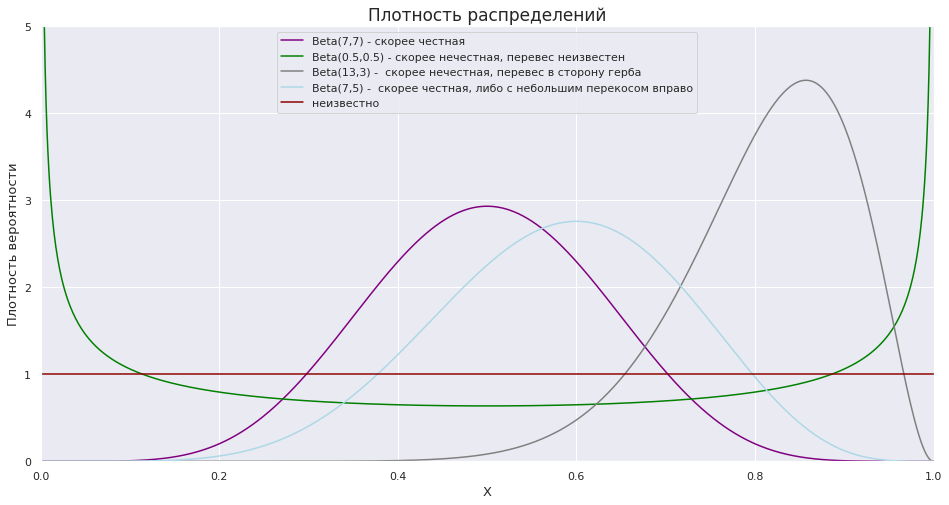

In [ ]:

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 8))
  x = np.linspace(0, 1, 1000)

  plt.title("Плотность распределений", fontsize=17)

  plt.plot(x, sps.beta.pdf(x, 7, 7), color='purple', label = "Beta(7,7) - скорее честная")
  plt.plot(x, sps.beta.pdf(x, 0.5, 0.5), color='green', label = "Beta(0.5,0.5) - cкорее нечестная, перевес неизвестен")
  plt.plot(x, sps.beta.pdf(x, 13, 3), color='grey', label = "Beta(13,3) -  скорее нечестная, перевес в сторону герба")
  plt.plot(x, sps.beta.pdf(x, 7, 5), color='lightblue', label = "Beta(7,5) -  скорее честная, либо с небольшим перекосом вправо")
  plt.plot(x, sps.uniform.pdf(x, scale = 1), color='darkred', label = "неизвестно")

  
  plt.legend()

  plt.ylim([0, 5])
  plt.xlim([0, 1])
  plt.xlabel("X", fontsize=13)
  plt.ylabel("Плотность вероятности", fontsize=13)
  plt.legend(loc='best')
  plt.show()

**Вывод:** 
1.   Первое, что бросается в глаза - высота пика зависит от
размера выборки (чем больше выборка, тем выше пик)
2.   Для честных или близких к честным монет распределения имеет максимум при x = 0.5 (серая и фиолетовая линии), 
3.   Для нечестных монет сдвиг происходит вправо в случае, если чаще выпадает герб, влево - если решка. Чем больший перевес, тем сильнее сдвинут максимум (голубая и серая линии)
4.   Если монета нечестная, то функция будет иметь минимум в 0.5 и возрастать при приближении к 0 или 1 (зеленая линия)
5.   В случае, если мы ничего не знаем про распределение, то плотность постоянно будет равна 1




Ниже приведена реализация некоторых вспомогательных функций

In [ ]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    '''
    Рисует серию графиков апостериорных плотностей.
    
    :param grid: сетка для построения графика
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0]
    plt.figure(figsize=(12, 7))
    for n in range(size):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, np.round(post_params[n], 3)), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.title('Апостериорное распределение в зависимости от размера выборки')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    
def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    '''
    Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
    
    :param ml: оценка максимального правдоподобия для 1 <= n <= len(sample)
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    size = len(ml)
    distrs = []
    for n in range(size): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size) + 1, [d.mean() for d in distrs], 
             label='Bayes', lw=2.5)
    plt.fill_between(np.arange(size) + 1, [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.3)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=2.5)
    plt.title('Оценки параметра в зависимости от размера выборки')
    plt.xlabel('Размер выборки')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [ ]:
def bern_posterior_params(sample, a, b):
    '''
    Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample). 
    
    :param sample: выборка
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    
    :returns: параметры апостериорного
    '''
    l = len(sample)
    sum = np.cumsum(sample)
    param = []
    
    for i in range (1, l + 1):
        param.append([a + sum[i - 1], b + i - sum[i - 1]])
    return np.array(param)

**2)** Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая — параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

1) Симметричная монетка, правильно подобранные параметры

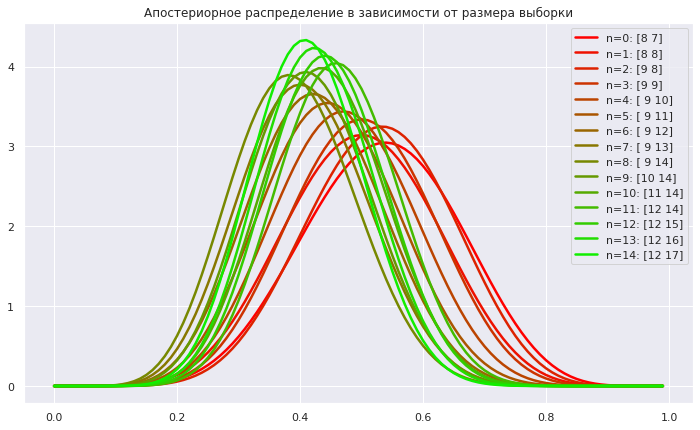

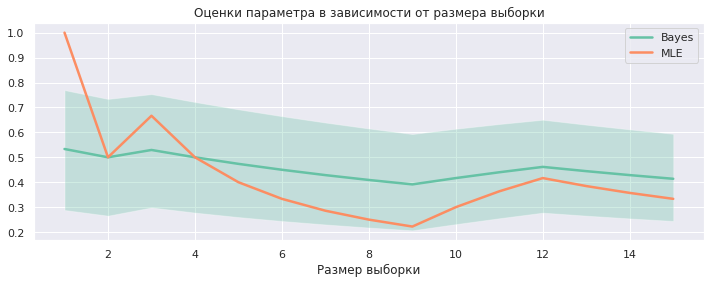

In [ ]:
sample = sps.bernoulli.rvs(size=15,p=0.5)
post_params = bern_posterior_params(sample, 7, 7)

grid = np.arange(0, 1, 0.01)
draw_posteriori(grid, sps.beta, post_params)

sum = np.cumsum(sample)
ml_list = []
for i in range (1, len(sample) + 1):
  ml_list.append(sum[i-1]/i)

ml = np.array(ml_list)
draw_estimations(ml, sps.beta, post_params)


2) Несимметричная монетка, правильно подобранные параметры

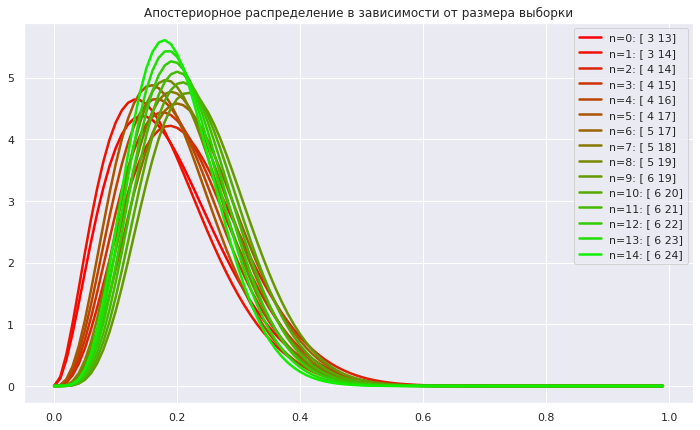

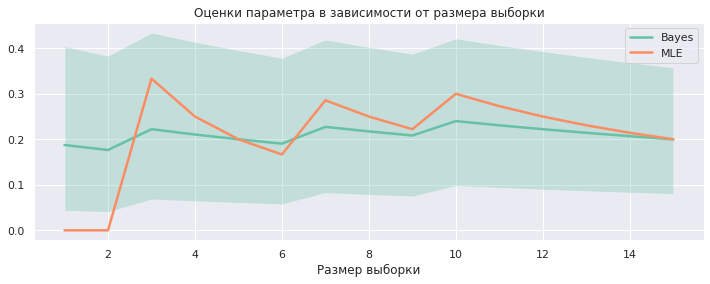

In [ ]:
sample = sps.bernoulli.rvs(size=15,p=0.25)
post_params = bern_posterior_params(sample, 3, 12)
grid = np.arange(0, 1, 0.01)
draw_posteriori(grid, sps.beta, post_params)

sum = np.cumsum(sample)
ml_list = []
for i in range (1, len(sample) + 1):
  ml_list.append(sum[i-1]/i)

ml = np.array(ml_list)
draw_estimations(ml, sps.beta, post_params)

3) Симметричная монетка, неправильно подобранные параметры

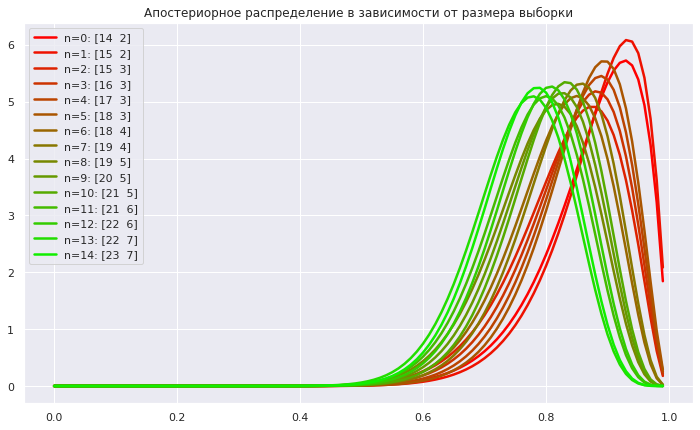

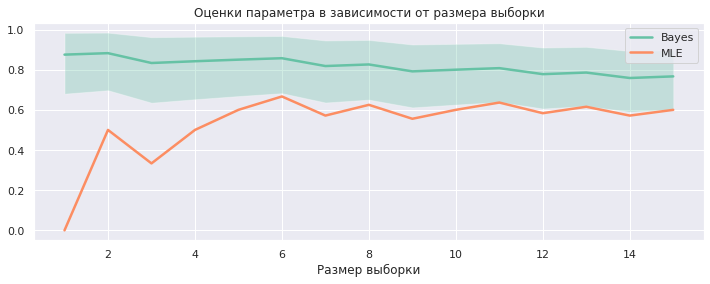

In [ ]:
sample = sps.bernoulli.rvs(size=15,p=0.5)
post_params = bern_posterior_params(sample, 14, 1)
grid = np.arange(0, 1, 0.01)
draw_posteriori(grid, sps.beta, post_params)

sum = np.cumsum(sample)
ml_list = []
for i in range (1, len(sample) + 1):
  ml_list.append(sum[i-1]/i)

ml = np.array(ml_list)
draw_estimations(ml, sps.beta, post_params)

4) Несимметричная монетка, неправильно подобранные параметры

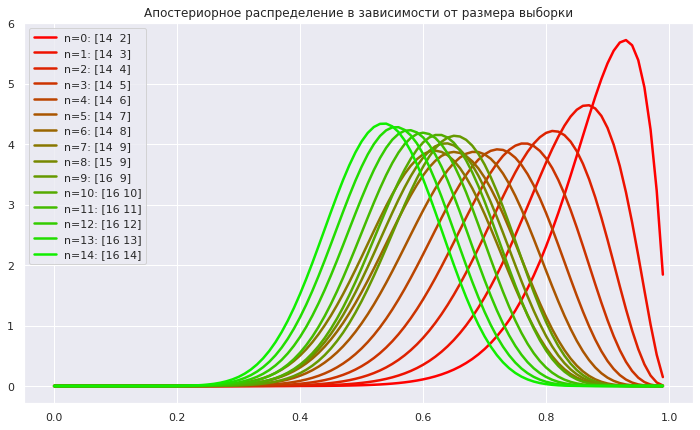

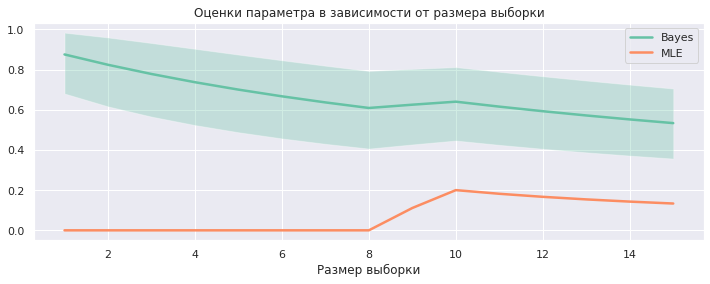

In [ ]:
sample = sps.bernoulli.rvs(size=15,p=0.25)
post_params = bern_posterior_params(sample, 14, 1)
grid = np.arange(0, 1, 0.01)
draw_posteriori(grid, sps.beta, post_params)

sum = np.cumsum(sample)
ml_list = []
for i in range (1, len(sample) + 1):
  ml_list.append(sum[i-1]/i)

ml = np.array(ml_list)
draw_estimations(ml, sps.beta, post_params)

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия параметра $p$. 

**Вывод:** Рассматривая графики с правильно подобранными параметрами, мы видим, что даже для маленьких размеров выборки у нас получают распределения, похожие на правду (и для симметричной, и для несимметричной монеты). При этом для неправильно подобранных параметров графики получаются более правдоподобные при выборке больше 10
